In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import matplotlib.dates as mdates

warnings.filterwarnings('ignore')
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
cwd = os.getcwd()
hourly_load = 'data/office_load_hourly.pkl'
load = 'data/office_load.pkl'
building_results = 'data/building_results.pkl'

# Load data
df_hourly_load = pd.read_pickle(os.path.join(cwd, hourly_load))
df_load = pd.read_pickle(os.path.join(cwd, load))
df_building_results = pd.read_pickle(os.path.join(cwd, building_results))

df_load

<Axes: >

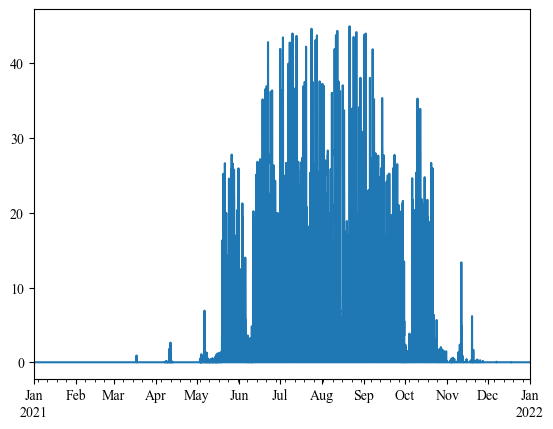

In [6]:
df = df_load.resample('H').sum()
df['Thermal energy need for space cooling [kWh]'].plot()

df_building_results

<Axes: >

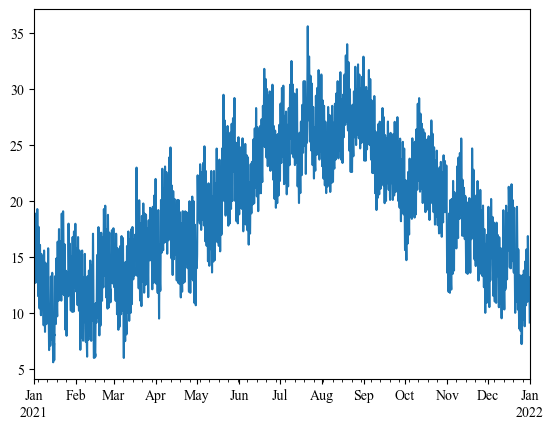

In [4]:
df_building_results['T                        '].plot()

e_price

In [19]:
price_path = 'data/italian case-study/Day-ahead Prices_2021Sicily-Italy.xlsx'

price_df = pd.read_excel(os.path.join(cwd, price_path), sheet_name='Sheet1', skiprows=6)
price_df.dropna(inplace=True)
display(price_df)

,Unnamed: 0,[EUR/MWh],Unnamed: 2
0,00:00 - 01:00,50.87,EUR
1,01:00 - 02:00,48.19,EUR
2,02:00 - 03:00,44.68,EUR
3,03:00 - 04:00,42.92,EUR
4,04:00 - 05:00,40.39,EUR
...,...,...,...
9848,19:00 - 20:00,219.14,EUR
9849,20:00 - 21:00,213.60,EUR
9850,21:00 - 22:00,192.79,EUR
9851,22:00 - 23:00,180.00,EUR


In [20]:
datetime = pd.date_range(start='2021-01-01 00:00:00', periods=len(price_df), freq='H')
price_df.index = datetime
display(price_df)

,Unnamed: 0,[EUR/MWh],Unnamed: 2
2021-01-01 00:00:00,00:00 - 01:00,50.87,EUR
2021-01-01 01:00:00,01:00 - 02:00,48.19,EUR
2021-01-01 02:00:00,02:00 - 03:00,44.68,EUR
2021-01-01 03:00:00,03:00 - 04:00,42.92,EUR
2021-01-01 04:00:00,04:00 - 05:00,40.39,EUR
...,...,...,...
2021-12-31 19:00:00,19:00 - 20:00,219.14,EUR
2021-12-31 20:00:00,20:00 - 21:00,213.60,EUR
2021-12-31 21:00:00,21:00 - 22:00,192.79,EUR
2021-12-31 22:00:00,22:00 - 23:00,180.00,EUR


In [21]:
total_df = pd.DataFrame(index=datetime)
total_df['e_price'] = price_df['[EUR/MWh]']
total_df = total_df.resample('15T').ffill()
total_df['outdoor_temp'] = df_building_results['T                        ']
total_df['outdoor_temp'] = pd.to_numeric(total_df['outdoor_temp'], errors='coerce').fillna(method='ffill')
total_df['load'] = df_load['Thermal energy need for space cooling [kWh]']
total_df['load'] = pd.to_numeric(total_df['load'], errors='coerce').fillna(method='ffill')

In [22]:
print(total_df.head())
total_df.to_pickle('data/total_df.pkl')

                     e_price  outdoor_temp  load
2021-01-01 00:00:00    50.87         9.100   0.0
2021-01-01 00:15:00    50.87         9.825   0.0
2021-01-01 00:30:00    50.87        11.275   0.0
2021-01-01 00:45:00    50.87        12.725   0.0
2021-01-01 01:00:00    48.19        14.175   0.0


In [25]:
total_df_hourly = pd.DataFrame(index=datetime)
total_df_hourly['e_price'] = price_df['[EUR/MWh]']
total_df_hourly['outdoor_temp'] = df_building_results['T                        ']
total_df_hourly['outdoor_temp'] = pd.to_numeric(total_df['outdoor_temp'], errors='coerce').fillna(method='ffill')
total_df_hourly['load'] = df_load['Thermal energy need for space cooling [kWh]'].resample('H').sum()
total_df_hourly['load'] = pd.to_numeric(total_df['load'], errors='coerce').fillna(method='ffill')

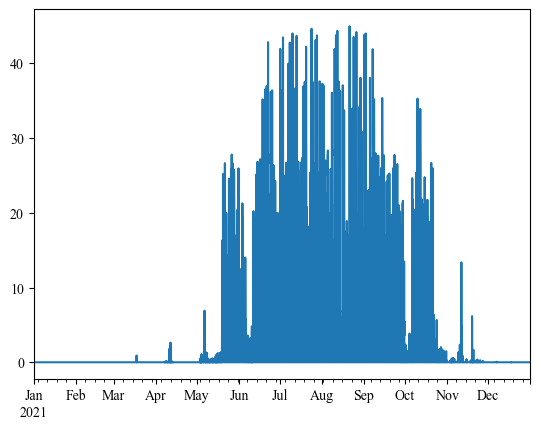

In [28]:
total_df_hourly['load'].plot()
total_df_hourly.to_pickle('data/total_df_hourly.pkl')